# Data Exploration

## Purpose:
The purpose of this notebook is to explore the data generated by data_scraper.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [2]:
# Import data
df = pd.read_csv("../data/wiki_movie_plots.csv")
print("Shape: %s" %str(df.shape))
df.head()

Shape: (35697, 8)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,NaN,NaN,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,NaN,NaN,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [3]:
# Count Null values
df.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director            1136
Cast                1443
Genre               6189
Wiki Page              0
Plot                   0
dtype: int64

The columns *Release Year*, *Title*, *Origin/Ethnicity*, *Wiki Page*, and *Plot* are non-null across all movies. Note, the data_scraper.py code filters out rows where *Title* and/or *Plot* are missing

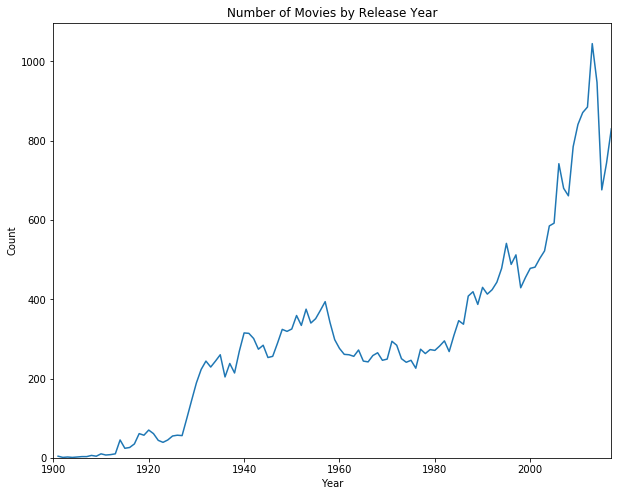

In [12]:
# Count movies by 'Release Year'
cnt = df.groupby("Release Year")["Title"].count()

plt.figure(figsize=(10,8))
plt.title("Number of Movies by Release Year")
plt.plot(cnt)
plt.xlim([1900, 2017])
y_min, y_max = plt.ylim()
plt.ylim([0, y_max])
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In general, the number of movies is increasing over time.  This can be attributed to both the increase in movies released over time and the increased availability of Wikipedia pages for more recent movies.

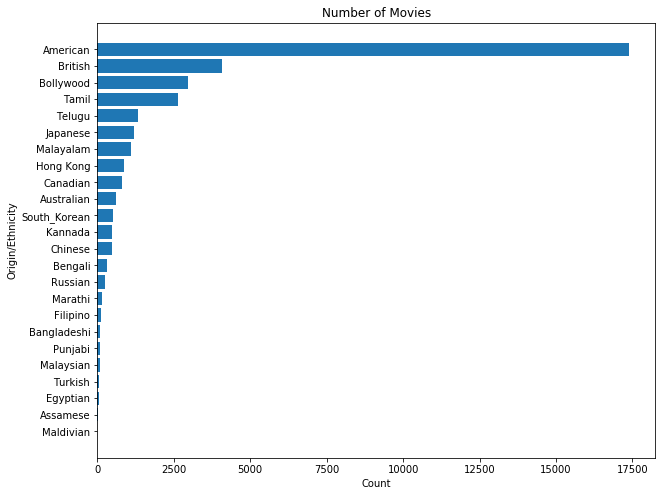

In [13]:
# Count movies by 'Origin/Ethnicity'
cnt = df.groupby("Origin/Ethnicity")["Title"].count().sort_values()

plt.figure(figsize=(10,8))
plt.title("Number of Movies")
ind = np.arange(cnt.shape[0])
plt.barh(ind, cnt)
plt.ylabel("Origin/Ethnicity")
plt.xlabel("Count")
plt.yticks(ind, cnt.index)
plt.show()

Approximately half of the movies in this dataset are American

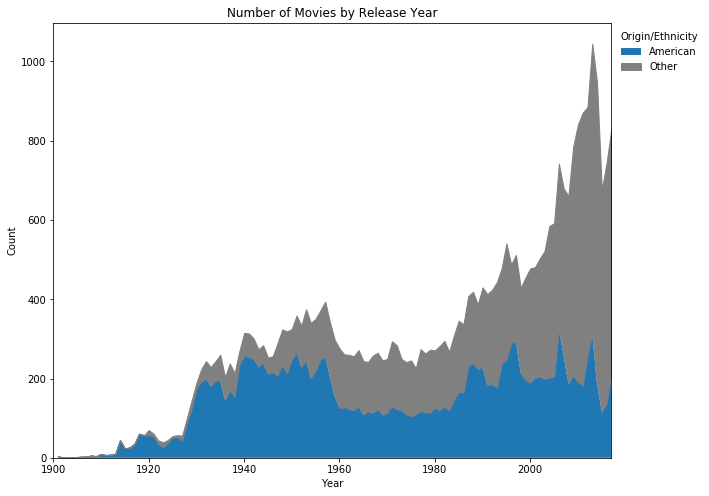

In [19]:
# Count movies by 'Release Year'
# US Only
cnt_us = df[df["Origin/Ethnicity"] == "American"].groupby("Release Year")["Title"].count()

# All
cnt = df.groupby("Release Year")["Title"].count()

plt.figure(figsize=(10,8))
plt.fill_between(cnt_us.index, 0, cnt_us, label="American")

plt.fill_between(cnt_us.index, cnt_us, cnt, color="grey", label="Other")

plt.title("Number of Movies by Release Year")
plt.xlim([1900, 2017])
y_min, y_max = plt.ylim()
plt.ylim([0, y_max])

plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(frameon=False, loc=2, bbox_to_anchor=(1,1), title="Origin/Ethnicity")
plt.show()

Around 1960, the number of non-American movies begins to exceed the number of American movies in this dataset.

In [24]:
df.groupby(["Origin/Ethnicity", "Director"])["Title"].count().sort_values(ascending=False)

Origin/Ethnicity  Director                      
American          Michael Curtiz                    79
                  Hanna-Barbera                     77
                  Lloyd Bacon                       66
                  Jules White                       63
                  John Ford                         58
                  Allan Dwan                        57
                  Norman Taurog                     56
                  William A. Seiter                 56
                  Richard Thorpe                    55
                  Mervyn LeRoy                      54
                  Raoul Walsh                       51
                  Gordon Douglas                    51
                  Alfred E. Green                   50
                  Henry Hathaway                    49
                  George Marshall                   49
                  Robert Z. Leonard                 48
                  Roy Del Ruth                      47
                